# Classification Modeling

In [38]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.grid_search import GridSearchCV

C:\Users\wecampbe\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\wecampbe\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Load Data

In [3]:
df = pd.read_csv('data/train.csv')

X = df.drop('label', axis=1)
y = df.label

df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


## Preprocessing
Create greyscale and binary image representations and split into training and testing sets


In [4]:
# Create a dataset with grayscale image data and another with binary (black and white) image data

X_greyscale = X
y_greyscale = y

convert_binary = lambda x: 1 if x > 0 else 0
X_binary = X.applymap(convert_binary)
y_binary = y.apply(convert_binary)

X_gs_train, X_gs_test, y_gs_train, y_gs_test = train_test_split(X_greyscale, y_greyscale, test_size=.25, random_state=1)
X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(X_binary, y_binary, test_size=.25, random_state=1)

In [5]:
X_greyscale.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


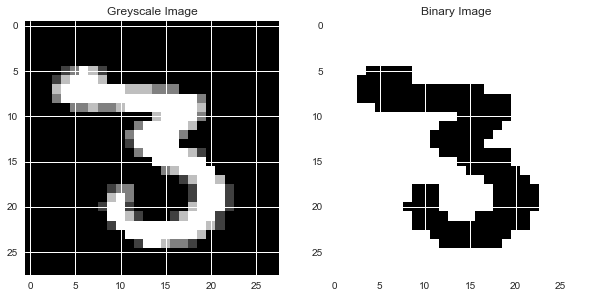

In [6]:
# Plot visualiztion of the different representations

plt.figure(figsize=(10, 6))

plt.figure(1)

plt.subplot(121)
image_greyscale = X_greyscale.iloc[13].as_matrix().reshape((28,28))
plt.imshow(image_greyscale, cmap='gray')
plt.title('Greyscale Image')

plt.subplot(122)
image_binary = X_binary.iloc[13].as_matrix().reshape((28,28))
plt.imshow(image_binary, cmap='binary')
plt.title('Binary Image')

## Baseline Models
Train and validate baseline models suing subset of training data 

In [7]:
# Use some basic models

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

# Use some ensemble methods, for this useit's okay if our model is a black box

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

baseline_models = [SVC, GaussianNB, QuadraticDiscriminantAnalysis, DecisionTreeClassifier, 
                   RandomForestClassifier, AdaBoostClassifier]
baseline_models_str = ['SVC', 'GaussianNB', 'QDA', 'Decision Tree', 
                   'Random Forest', 'Ada Boost']
baseline_scores_greyscale = []
baseline_scores_binary = []

for m in baseline_models:
    baseline_scores_greyscale.append(np.mean(cross_val_score(m(), X_gs_train[:5000], y_gs_train[:5000])))
    
for m in baseline_models:
    baseline_scores_binary.append(np.mean(cross_val_score(m(), X_binary_train[:5000], y_binary_train[:5000])))

C:\Users\wecampbe\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [8]:
baseline_df = pd.DataFrame()
baseline_df['model'] = pd.Series(baseline_models_str*2)
baseline_df['score'] = pd.Series(baseline_scores_greyscale + baseline_scores_binary)
baseline_df['kind'] = pd.Series(['Greyscale']*len(baseline_models) + ['Binary']*len(baseline_models))

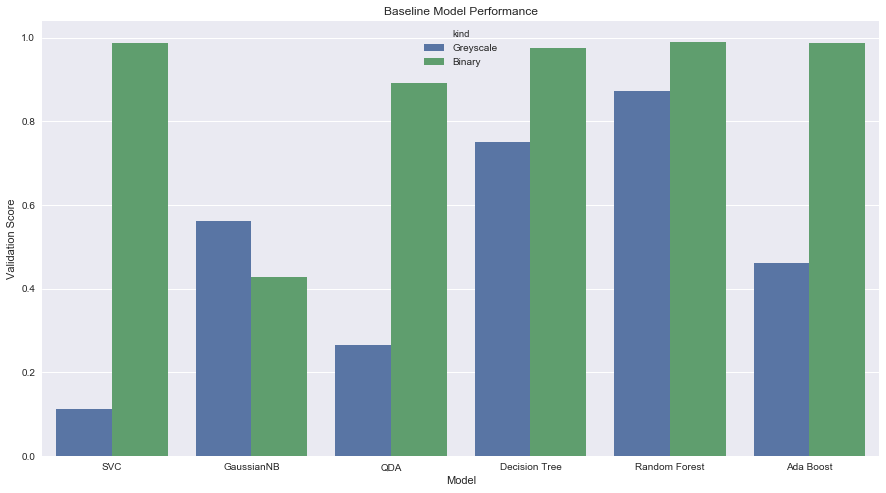

In [9]:
plt.figure(figsize=(15, 8))

ax = sns.barplot(x='model', y='score', hue='kind', data = baseline_df)
ax.set(title='Baseline Model Performance', xlabel='Model', ylabel="Validation Score")

In [10]:
models = baseline_df.model.tolist()
scores = baseline_df.score.tolist()
kinds = baseline_df.kind.tolist()
for model, kind, score in zip(models, kinds, scores):
    print model, '(', kind, '):', score

SVC ( Greyscale ): 0.111799918568
GaussianNB ( Greyscale ): 0.560604529792
QDA ( Greyscale ): 0.265594278511
Decision Tree ( Greyscale ): 0.749810165664
Random Forest ( Greyscale ): 0.873587601736
Ada Boost ( Greyscale ): 0.460671474014
SVC ( Binary ): 0.987999036545
GaussianNB ( Binary ): 0.428813731728
QDA ( Binary ): 0.892798846157
Decision Tree ( Binary ): 0.975999272611
Random Forest ( Binary ): 0.990599117345
Ada Boost ( Binary ): 0.987200155842


Validation scores are generally much higher when using the binary representation of the images as opposed to the greyscale representation. The only model that scores lower is the Naive Bayes model, which makes sense since it's the only generative one in this set and greyscale values allow it to better emulate the natural distribution of a given digit.

## Model Tuning
Tune hyperparameters of best models (SVC and Random Forest) using cross-validation

### SVM

In [11]:
# Build linear SVC
svc_linear = SVC(kernel='linear')
params_linear = np.logspace(-6, 6, 20)

# Perform cross-validation to find optimal C value
scores_linear = []
for i in params_linear:
    svc_linear.C = i
    scores = cross_val_score(svc_linear, X_binary_train[:3000], y_binary_train[:3000], cv=5)
    scores_linear.append(1 - np.mean(scores))

index_linear = scores_linear.index(min(scores_linear))
C_linear = params_linear[index_linear]

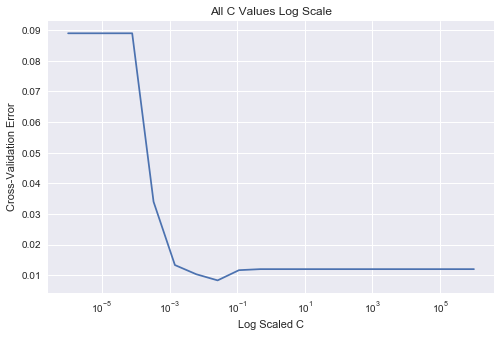

Optimal C:  0.0263665089873


In [12]:
# Plot cross-validation error

plt.figure(figsize=(8, 5))

plt.plot(params_linear, scores_linear)
plt.xlabel('Log Scaled C')
plt.ylabel('Cross-Validation Error')
plt.title('All C Values Log Scale')
plt.xscale('log')
plt.show()
print 'Optimal C: ', C_linear

In [42]:
svc_tuned = SVC(kernel='linear', C=C_linear)
svc_tuned.fit(X_binary_train, y_binary_train)
svc_predict = svc_tuned.predict(X_binary_test)
svc_accuracy = accuracy_score(y_binary_test, svc_predict)
print 'Tuned SVM Accuracy: ', svc_accuracy

Tuned SVM Accuracy:  0.992


In [45]:
parameter_candidates = [
  {'C': [.001, .01, 1, 10, 100], 'kernel': ['linear']},
  {'C': [.001, .01, 1, 10, 100], 'gamma': [.01, .001, 0.0001], 'kernel': ['rbf']},
]

clf = GridSearchCV(estimator=SVC(), param_grid=parameter_candidates, n_jobs=-1)

clf.fit(X_binary_train[:5000], y_binary_train[:5000])   

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'kernel': ['linear'], 'C': [0.001, 0.01, 1, 10, 100]}, {'kernel': ['rbf'], 'C': [0.001, 0.01, 1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [46]:
clf.best_score_

0.996

### Random Forest

In [14]:
# Build new random forest classifier
rf = RandomForestClassifier()

# Perfrom cross-validation to find optimal maximum features parameter
scores_max_features = []
params_max_features = np.logspace(1, 700, 20)
for x in params_max_features:
    rf.max_features = x
    scores = cross_val_score(rf, X_binary_train[:10000], y_binary_train[:10000], cv=10)
    scores_max_features.append(1 - np.mean(scores))

index_max_features = scores_max_features.index(min(scores_max_features))
optimal_max_features = params_max_features[index_max_features]

C:\Users\wecampbe\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\core\function_base.py:226: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)


ValueError: max_features must be in (0, n_features]

ValueError: x and y must have same first dimension, but have shapes (20L,) and (0L,)

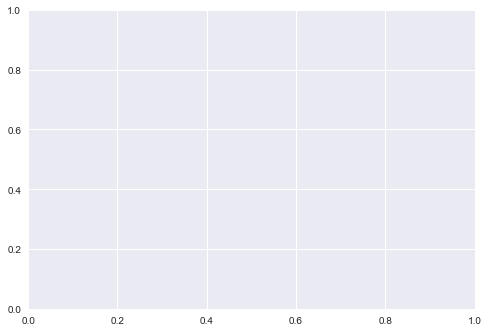

In [15]:
plt.plot(params_max_features, scores_max_features)
plt.xlabel('Log Scaled # Max Features')
plt.ylabel('Cross-Validation Error')
plt.title('All # Max Features Values Log Scale')
plt.xscale('log')
plt.show()
print 'Optimal # Max Features: ', optimal_max_features

In [17]:
# Build new random forest classifier
rf = RandomForestClassifier()

# Perfrom cross-validation to find optimal maximum depth parameter
scores_max_depth = []
params_max_depth = np.logspace(1, 8, 20)
for x in params_max_depth:
    rf.max_depth = x
    scores = cross_val_score(rf, X_binary_train[:10000], y_binary_train[:10000], cv=10)
    scores_max_depth.append(1 - np.mean(scores))

index_max_depth = scores_max_depth.index(min(scores_max_depth))
optimal_max_depth = params_max_depth[index_max_depth]

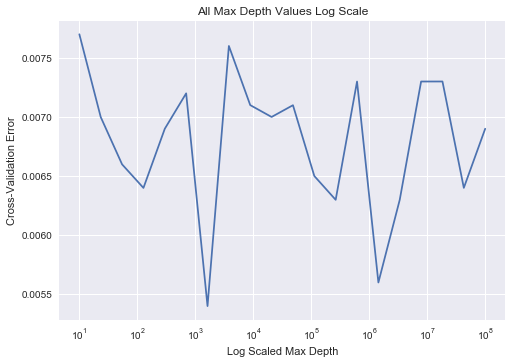

Optimal Max Depth:  1623.77673919


In [18]:
plt.plot(params_max_depth, scores_max_depth)
plt.xlabel('Log Scaled Max Depth')
plt.ylabel('Cross-Validation Error')
plt.title('All Max Depth Values Log Scale')
plt.xscale('log')
plt.show()
print 'Optimal Max Depth: ', optimal_max_depth

In [35]:
# Build new random forest classifier
rf = RandomForestClassifier()

# Perfrom cross-validation to find optimal number of estimators
scores_num_estimators = []
params_num_estimators = range(10,30)
for x in params_num_estimators:
    rf.n_estimators = int(round(x))
    scores = cross_val_score(rf, X_binary_train[:5000], y_binary_train[:5000], cv=5)
    scores_num_estimators.append(1 - np.mean(scores))

index_num_estimators = scores_num_estimators.index(min(scores_num_estimators))
optimal_num_estimators = params_num_estimators[index_num_estimators]

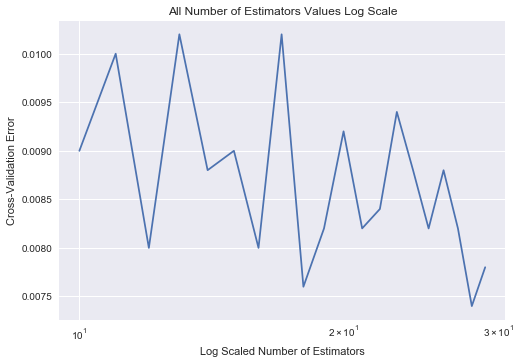

Optimal Number of Estimators:  28


In [36]:
plt.plot(params_num_estimators, scores_num_estimators)
plt.xlabel('Log Scaled Number of Estimators')
plt.ylabel('Cross-Validation Error')
plt.title('All Number of Estimators Values Log Scale')
plt.xscale('log')
plt.show()
print 'Optimal Number of Estimators: ', optimal_num_estimators

In [47]:
parameter_candidates = [
  {'n_estimators': [10, 100, 500, 1000], 'max_features': ['sqrt', 'log2']},
]

clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameter_candidates, n_jobs=-1)

clf.fit(X_binary_train[:5000], y_binary_train[:5000])   

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [10, 100, 500, 1000], 'max_features': ['sqrt', 'log2']}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [48]:
clf.best_score_

0.9918

In [61]:
np.linspace(1,10000000000, 10)

array([  1.00000000e+00,   1.11111111e+09,   2.22222222e+09,
         3.33333333e+09,   4.44444444e+09,   5.55555556e+09,
         6.66666667e+09,   7.77777778e+09,   8.88888889e+09,
         1.00000000e+10])